Copyright © 2022 LMU Munich Media Informatics Group. All rights reserved.

Based on discussions between [Changkun Ou](https://changkun.de), [Francesco Chiossi](https://www.um.informatik.uni-muenchen.de/personen/mitarbeiter/chiossi/index.html), and [Sven Mayer](https://sven-mayer.com).

Use of this source code is governed by a GNU GPLv3 license that
can be found in the LICENSE file.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.preamble'] = r'''\usepackage{libertine}'''
plt.rcParams['ps.usedistiller'] = 'xpdf'
sns.set_theme(style='ticks')

## Figure 5

In [4]:
df_ecg = pd.read_csv('./clean/ecg.csv')
df_ecg = df_ecg.query('user_id not in [12, 20, 14, 22]')
df_ecg = df_ecg[df_ecg['falls_num'] != 0]
df_eda = pd.read_csv('./clean/eda.csv')
df_eda = df_eda.query('user_id not in [12, 20, 14, 22]')
df_eda = df_eda[df_eda['falls_num'] != 0]

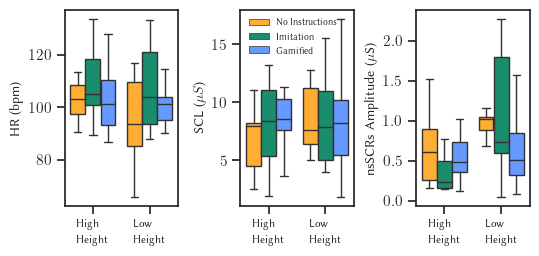

In [5]:
x = 'tide'
hue = 'method'
order = ['LowTide', 'HighTide']
hue_order = ['NoInstructions', 'Imitation', 'Gamification']

fig, (axes) = plt.subplots(1, 3, figsize=(6, 2))
palette = ['#FFAD33', '#198D6D', '#6599FF']


sns.boxplot(ax=axes[0], data=df_ecg, x=x, y='ecg_rate', order=order, hue=hue,
            hue_order=hue_order, linewidth=1, showfliers=False, saturation=1,
            palette=palette)
axes[0].get_legend().remove()
axes[0].set_xlabel(None)
axes[0].set_xticklabels(['High\nHeight', 'Low\nHeight'], fontsize=8)
axes[0].set_ylabel('HR (bpm)', fontsize=10)

sns.boxplot(ax=axes[1], data=df_eda, x=x, y='tonic_avg', order=order, hue=hue,
            hue_order=hue_order, linewidth=1, showfliers=False, saturation=1,
            palette=palette)
axes[1].legend(loc='upper left', frameon=False, fontsize=7)
leg = axes[1].get_legend()
labels = ['No Instructions', 'Imitation', 'Gamified']
for t, l in zip(leg.texts, labels):
    t.set_text(l)
axes[1].set_xticklabels(
    ['High\nHeight', 'Low\nHeight'], fontsize=8)
axes[1].set_xlabel(None)
axes[1].set_ylabel('SCL ($\mu S$)', fontsize=10)

sns.boxplot(ax=axes[2], data=df_eda, x=x, y='amplitude_avg', order=order, hue=hue,
            hue_order=hue_order, linewidth=1, showfliers=False, saturation=1,
            palette=palette)
axes[2].get_legend().remove()
axes[2].set_xlabel(None)
axes[2].set_xticklabels(
    ['High\nHeight', 'Low\nHeight'], fontsize=8)
axes[2].ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
axes[2].set_ylabel(
    'nsSCRs Amplitude ($\mu$S)', fontsize=10)
axes[2].get_yaxis().get_offset_text().set_visible(False)

plt.subplots_adjust(top=0.99, bottom=0.01, hspace=0.1, wspace=0.55)
plt.savefig('../assets/fig5.pdf', bbox_inches='tight')


## Figure 6

In [9]:
df = pd.read_csv('./clean/motion_series_percent.csv')
df = df.query('user_id not in [12, 20, 14, 22]')
sample_rate = 500

df = df.drop(columns=['user_id'])

# each lap is sampled sample_rate points. We need reset the time
# index to be able to draw mean and std.
i = 0
for index, row in df.iterrows():
    df.loc[index, 'time'] = i % sample_rate
    i = i + 1

df.to_csv('./clean/motion_series_percent_draw.csv')

/tmp/ipykernel_297003/2431334933.py:53: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0][2].set_yticklabels(degree_ticks)
/tmp/ipykernel_297003/2431334933.py:57: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1][0].set_xticklabels(xticks)
/tmp/ipykernel_297003/2431334933.py:67: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1][1].set_xticklabels(xticks)
/tmp/ipykernel_297003/2431334933.py:70: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1][2].set_xticklabels(xticks)
/tmp/ipykernel_297003/2431334933.py:73: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1][2].set_yticklabels(degree_ticks)


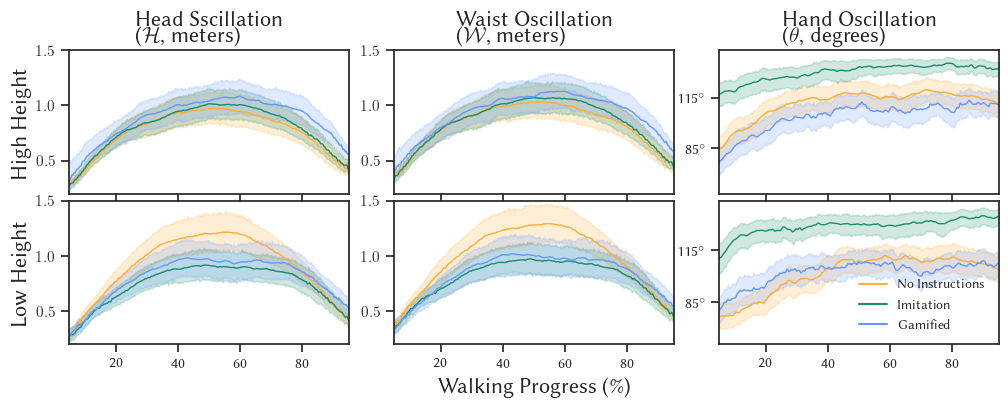

In [10]:
fig, axes = plt.subplots(2, 3, figsize=(12, 3))
palette = ['#FFAD33', '#198D6D', '#6599FF']

t = 'LowTide'
df_draw = df[(df['tide'] == t)]
sns.lineplot(ax=axes[0][0], x="time", y="drift_head", hue="method",
             data=df_draw, palette=palette, linewidth=1)
sns.lineplot(ax=axes[0][1], x="time", y="drift_pelvis", hue="method",
             data=df_draw, palette=palette, linewidth=1)
sns.lineplot(ax=axes[0][2], x="time", y="alpha", hue="method",
             data=df_draw, palette=palette, linewidth=1)

t = 'HighTide'
df_draw = df[(df['tide'] == t)]
sns.lineplot(ax=axes[1][0], x="time", y="drift_head", hue="method",
             data=df_draw, palette=palette, linewidth=1)
sns.lineplot(ax=axes[1][1], x="time", y="drift_pelvis", hue="method",
             data=df_draw, palette=palette, linewidth=1)
sns.lineplot(ax=axes[1][2], x="time", y="alpha", hue="method",
             data=df_draw, palette=palette, linewidth=1)

fontsize = 14
sample_rate = 500
xticks = ['0', '20', '40', '60', '80']
interval = [sample_rate*0.05, sample_rate - sample_rate*0.05]
degree_ticks = ['55$^{\circ}$', '85$^{\circ}$',
                '115$^{\circ}$', '130$^{\circ}$']

axes[0][0].set_xlim(interval)
axes[0][0].set_ylim([0.2, 1.5])

axes[0][0].get_legend().remove()
axes[0][0].set_xlabel(None)
axes[0][0].set_xticklabels([])
axes[0][0].set_ylabel('High Height', fontsize=16)
axes[0][0].set_title('Head Sscillation\n($\mathcal{H}$, meters)', fontsize=16)

axes[0][1].set_xlim(interval)
axes[0][1].set_ylim([0.2, 1.5])
axes[0][1].get_legend().remove()
axes[0][1].set_xlabel(None)
axes[0][1].set_xticklabels([])
axes[0][1].set_ylabel(None)
axes[0][1].set_title('Waist Oscillation\n($\mathcal{W}$, meters)', fontsize=16)

axes[0][2].set_xlim(interval)
axes[0][2].get_legend().remove()
axes[0][2].set_xlabel(None)
axes[0][2].set_xticklabels([])
axes[0][2].set_ylabel(None)
axes[0][2].set_title(
    'Hand Oscillation\n($\\theta$, degrees)', fontsize=16)
axes[0][2].set_yticklabels(degree_ticks)

axes[1][0].set_xlim(interval)
axes[1][0].set_ylim([0.2, 1.5])
axes[1][0].set_xticklabels(xticks)
axes[1][0].get_legend().remove()
axes[1][0].set_xlabel(None)
axes[1][0].set_ylabel('Low Height', fontsize=16)

axes[1][1].set_xlim(interval)
axes[1][1].set_ylim([0.2, 1.5])
axes[1][1].get_legend().remove()
axes[1][1].set_xlabel('Walking Progress (\%)', fontsize=16)
axes[1][1].set_ylabel(None)
axes[1][1].set_xticklabels(xticks)

axes[1][2].set_xlim(interval)
axes[1][2].set_xticklabels(xticks)
axes[1][2].set_xlabel(None)
axes[1][2].set_ylabel(None)
axes[1][2].set_yticklabels(degree_ticks)
axes[1][2].legend(loc='lower right', frameon=False, fontsize=10)
leg = axes[1][2].get_legend()
labels = ['No Instructions', 'Imitation', 'Gamified']
for t, l in zip(leg.texts, labels):
    t.set_text(l)

plt.subplots_adjust(top=0.99, bottom=0.01, hspace=0.05, wspace=0.16)
plt.savefig('../assets/fig6.pdf', bbox_inches='tight')

/tmp/ipykernel_297003/3342657183.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels([f'{v:.0f}' for v in ax1.get_yticks()], fontsize=fontsize)
/tmp/ipykernel_297003/3342657183.py:50: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels([f'{v:.0f}' for v in ax2.get_yticks()], fontsize=fontsize)
/tmp/ipykernel_297003/3342657183.py:59: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_yticklabels([f'{v:.0f}' for v in ax3.get_yticks()], fontsize=fontsize)


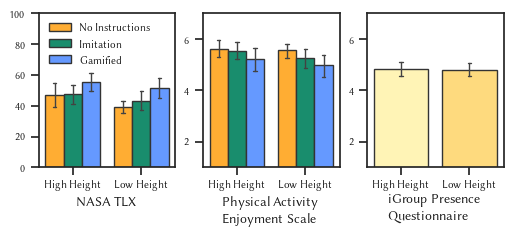

In [15]:
palette = ['#FFAD33', '#198D6D', '#6599FF']
df_nasatlx = pd.read_csv('./clean/nasa_tlx.csv')
df_nasatlx = df_nasatlx.query('user_id not in [12, 20, 14, 22]')
df_nasatlx = df_nasatlx.groupby(
    ['user_id', 'method', 'tide']).mean().reset_index()
df_ipq = pd.read_csv('./clean/ipq.csv')
df_ipq = df_ipq.query('user_id not in [12, 20, 14, 22]')
df_ipq = df_ipq.groupby(
    ['user_id', 'tide']).mean().reset_index()
df_paces = pd.read_csv('./clean/paces.csv')
df_paces = df_paces.query('user_id not in [12, 20, 14, 22]')
df_paces = df_paces.groupby(
    ['user_id', 'method', 'tide']).mean().reset_index()

x = 'tide'
y = 'tlx'
hue = 'method'
order = ['LowTide', 'HighTide']
hue_order = ['NoInstructions', 'Imitation', 'Gamification']
labels_tide = ['High Height', 'Low Height']
labels_method = ['No Instructions', 'Imitation', 'Gamified']
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(6, 2))
fontsize = 8

g = sns.barplot(ax=ax1, data=df_nasatlx, x=x, y=y, order=order, hue=hue, edgecolor=".2",
                hue_order=hue_order, linewidth=1, capsize=.05, errwidth=1, saturation=1,
                palette=palette)
ax1.set_xticklabels(labels_tide, fontsize=fontsize)
ax1.legend(loc='upper left', frameon=False, fontsize=fontsize)
leg = ax1.get_legend()
for t, l in zip(leg.texts, labels_method):
    t.set_text(l)
ax1.set_ylim([0, 100])
ax1.set_ylabel(None)
ax1.set_xlabel('NASA TLX', fontsize=10)
ax1.set_yticklabels([f'{v:.0f}' for v in ax1.get_yticks()], fontsize=fontsize)

sns.barplot(ax=ax2, data=df_paces, x=x, y=y, order=order, hue=hue, edgecolor=".2",
            hue_order=hue_order, linewidth=1, capsize=.05, errwidth=1, saturation=1,
            palette=palette)
ax2.set_xticklabels(labels_tide, fontsize=fontsize)
ax2.legend(loc='upper left', frameon=False, fontsize=fontsize)
leg = ax2.get_legend()
for t, l in zip(leg.texts, labels_method):
    t.set_text(l)
ax2.set_ylim([1, 7])
ax2.set_ylabel(None)
ax2.get_legend().remove()
ax2.set_xlabel('Physical Activity\nEnjoyment Scale', fontsize=10)
ax2.set_yticklabels([f'{v:.0f}' for v in ax2.get_yticks()], fontsize=fontsize)

sns.barplot(ax=ax3, data=df_ipq, x=x, y='ipq', order=order, saturation=1,
            edgecolor=".2", linewidth=1, capsize=.05, errwidth=1,
            palette=sns.color_palette("YlOrBr", n_colors=6))
ax3.set_xticklabels(labels_tide, fontsize=fontsize)
ax3.set_ylim([1, 7])
ax3.set_ylabel(None)
ax3.set_xlabel('iGroup Presence\nQuestionnaire', fontsize=10)
ax3.set_yticklabels([f'{v:.0f}' for v in ax3.get_yticks()], fontsize=fontsize)


plt.savefig('../assets/fig7.pdf', bbox_inches='tight')